In [ ]:
# Usaremos la base de datos Covertype Data Set
# https://archive.ics.uci.edu/ml/datasets/Covertype

# Esta base de datos contiene información sobre tipos de bósques, capturada para
# pequeñas regiones de 30x30 metros. Los datos fueron colectados por el US Forest
# Service (USFS). Las variables independientes 'X' son cartográficas, y sus
# respectivas etiquetas 'Y' son enteros [1, 7] indicando 7 posibles clases de bosque.

# El objetivo es diseñar redes neuronales que, con ayuda de regularizadores,
# sean capaces de obtener buen desempeño de clasificación multi-clase, tanto
# en los datos de entrenamiento, como en los de validación y los de prueba,
# i.e., sin sobre ajuste.

# Part 1: Load dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
# Read data file
df = pd.read_csv('covtype.csv') # Cambia al nombre del archivo que cargues
df.dropna(inplace=True)
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [ ]:
# Look at label's distribution
df['Cover_Type'].value_counts() # Base de datos desbalanceada.

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

In [ ]:
# Balance dataset
def sampling_k_elements(group, N=2700):
  if len(group) < N:
    return group
  return group.sample(N)

df = df.groupby('Cover_Type').apply(sampling_k_elements).reset_index(drop=True)
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,3091,316,13,395,-21,2174,184,228,183,607,...,0,0,0,0,0,0,0,0,0,1
1,3213,96,2,391,32,5665,223,236,149,2601,...,0,0,0,0,0,0,0,0,0,1
2,2956,70,14,323,122,793,234,211,105,1092,...,0,1,0,0,0,0,0,0,0,1
3,3154,52,5,511,75,5430,223,228,141,1637,...,0,0,0,0,0,0,0,0,0,1
4,3027,320,17,124,19,2791,173,221,187,2314,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18895,3198,94,22,256,29,1282,249,200,68,1263,...,0,0,0,0,0,0,0,0,0,7
18896,3400,301,7,376,61,1591,201,237,176,1055,...,0,0,0,0,0,0,1,0,0,7
18897,3348,81,40,256,117,2364,237,137,0,592,...,0,0,0,0,0,0,0,1,0,7
18898,3305,169,14,400,87,3095,230,245,144,2210,...,0,0,0,0,0,0,0,0,0,7


In [ ]:
# Look at label's distribution
df['Cover_Type'].value_counts() # Base de datos desbalanceada.

1    2700
2    2700
3    2700
4    2700
5    2700
6    2700
7    2700
Name: Cover_Type, dtype: int64

In [ ]:
# Split training, validation, and test sets
df_train, df_test = train_test_split(df, test_size=0.1)
df_train, df_val = train_test_split(df_train, test_size=0.1)

print(df_train.shape)
print(df_val.shape)
print(df_test.shape)

(15309, 55)
(1701, 55)
(1890, 55)


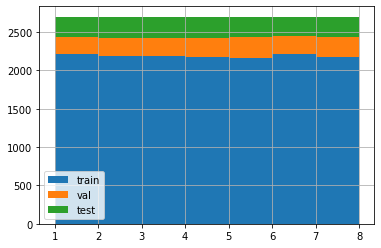

In [ ]:
# Visualize distribution of splits
plt.figure(figsize=(6, 4))
plt.hist([df_train['Cover_Type'], df_val['Cover_Type'], df_test['Cover_Type']],
         bins=range(1, 9), stacked=True, label=['train', 'val', 'test'])
plt.legend()
plt.grid()
plt.show()

In [ ]:
# == Q1 ==
# En la celda siguiente convertimos las etiquetas a formato one-hot enconding.
# Nota que definimos num_classes=8, aunque la base de datos sólo contiene 7 clases.
# Revisa la documentación de la función to_categorical() para entender por qué
# indicamos 8 clases en nuestra conversión. Reporta tu respuesta.

In [ ]:
# Extract labels as matrices
y_train = df_train['Cover_Type'].to_numpy()
y_val = df_val['Cover_Type'].to_numpy()
y_test = df_test['Cover_Type'].to_numpy()
print(y_test[:10])

# And turn them into one-hot encoding format
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=8)[:, 1:]
y_val = to_categorical(y_val, num_classes=8)[:, 1:]
y_test = to_categorical(y_test,num_classes=8)[:, 1:]

print("Y shapes")
print("y_train:", y_train.shape)
print("y_val:", y_val.shape)
print("y_test:", y_test.shape)
print(y_test[:10])

[4 6 1 4 3 1 5 4 7 2]
Y shapes
y_train: (15309, 7)
y_val: (1701, 7)
y_test: (1890, 7)
[[0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0.]]


X shapes
x_train: (15309, 54)
x_val: (1701, 54)
x_test: (1890, 54)


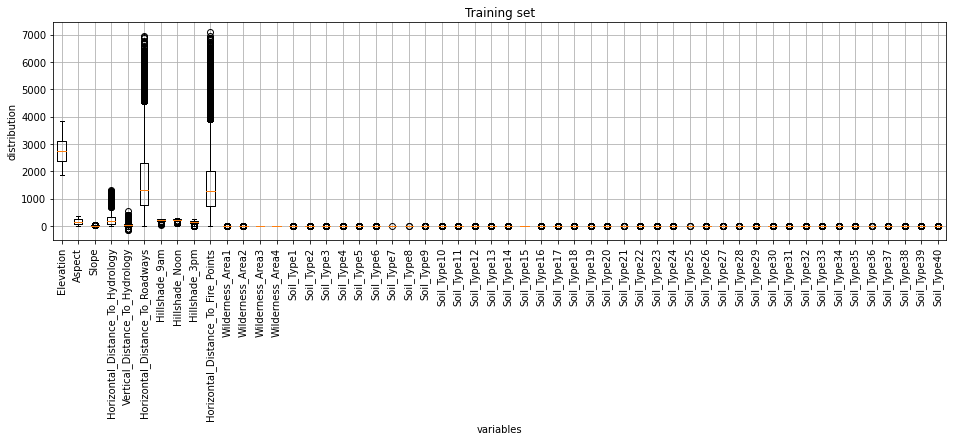

In [ ]:
# Extract independent variables as matrices
x_train = df_train.to_numpy()[:, :-1]
x_val = df_val.to_numpy()[:, :-1]
x_test = df_test.to_numpy()[:, :-1]

print("X shapes")
print("x_train:", x_train.shape)
print("x_val:", x_val.shape)
print("x_test:", x_test.shape)

plt.figure(figsize=(16, 4))
plt.title('Training set')
plt.boxplot(x_train)
plt.xticks(range(1, 55), df.columns[:-1], rotation=90)
plt.xlabel('variables')
plt.ylabel('distribution')
plt.grid()
plt.show()

# Part 2: Create DNN model and train it

In [1]:
# tensorflow imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Activation, BatchNormalization, Dropout, LeakyReLU
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# == - ==
# La celda siguiente contiene una función auxiliar para crear ANN.
#
# Más adelante verás dos corridas de una misma arquitectura. La primera se entrenó
# por 200 épocas y resultó en sobre ajuste. La segunda usó early stopping para
# evitar sobre ajuste, pero resultó en sub ajuste.
#
# Encuentra un modelo que tenga buen desempeño de entrenamiento y bajo error de
# generalización. Tip, la forma común de hacer en DL es la siguiente:
# 1. Encuentra el mejor modelo posible para el set de entrenamiento (quizás genere sobre ajuste).
# 2. Si no hay sobre ajuste, ya terminamos.
# 3. Si hay sobre ajuste, ahora incluyamos regularizadores para disminuir el
#    error de generalización.
# 4. Es posible que al añadir regularizadores comprometamos el desempeño que el
#    modelo había obtenido en el set de entrenamiento, de manera que quizás sea
#    necesario aumentar la capacidad del modelo (más parámetros). Por lo tanto
#    este proceso se vuelve iterativo.

# Nota que importamos layers tipo BatchNorm y Dropout, los cuales pueden ser 
# usados en distintas secciones del modelo.
# También importamos regularizadores l1, l2, y l1_l2, los cuales pueden ser
# usados como argumentos de las capas de la red.
#
# "Puedes usar early stopping si lo consideras de utilidad".
#
# Q2: ¿Por qué usamos softmax en la salida de la red?
# Q3: Ajusta el primer modelo (sin regularizadores) para obtener una pérdida de
#     "entrenamiento" menor o igual a 0.08 y exactitud mayor o igual a 98%.
#     Reporta el número de capas, número de unidades en cada capa, y número de
#     parámetros.
# Q4: Ahora usa esos mismos valores de hiperparámetros (número de capas y unidades)
#     en el siguiente modelo, y añade capas dropout (ajusta sus tasa), capas
#     batchnorm, y regularizadores l1 o l2 (ajusta sus alfas) para disminuir el
#     error de generalización.
#     Reporta el modelo regularizado que te haya dado mejores resultados.
# Q5: Partiendo del mejor modelo que hayas obtenido anteriormente, modifica
#     el número de sus capas y unidades para disminuir aún más los errores, tanto
#     el de entrenamiento como el de validación (i.e., dale mayor capacidad).
#     Reporta tu mejor modelo.
# =======

In [3]:
# AUX function to create a model
def create_model():
  DNN = Sequential()
  DNN.add(InputLayer(input_shape=x_train.shape[1:]))

  DNN.add(Dense(128))
  DNN.add(LeakyReLU(0.15)) # LeakyReLU esta definido como layer. Por eso el layer anterior sólo hace combinación lineal
  DNN.add(Dropout(0.1)) # para Dropout debemos indicar el %
  DNN.add(Dense(32, activation='relu', kernel_regularizer=l1(1e-4))) # uso de regularizador L1 con alfa = 1e-4
  DNN.add(BatchNormalization()) # Uso de batchnorm
  DNN.add(Dense(32, activation='relu', kernel_regularizer=l2(1e-6))) # uso de regularizador L2 con alfa = 1e-6
  DNN.add(Dense(units=y_train.shape[1], activation='softmax'))
  # Los regularizadores podemos combinarlos como queramos/necesitemos
  return DNN

In [4]:
# Create a Deep Network
DNN = create_model()
DNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               7040      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 128)               0         
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                        

In [ ]:
# Define training parameters
DNN.compile(optimizer='adam', loss='categorical_crossentropy',
            metrics=['categorical_accuracy', tf.keras.metrics.FalseNegatives()])

In [ ]:
# == Q6 ==
# En la celda anterior usamos 'categorical_accuracy' como métrica de monitoreo.
# Revisa la documentación de tensorflow, y explica la diferencia entre las
# métricas 'accuracy', 'binary_accuracy', y 'categorical_accuracy'.

In [ ]:
# Train model
DNN.fit(x=x_train, y=y_train, batch_size=64, epochs=200, validation_data=(x_val, y_val))

Epoch 1/200
240/240 [==============================] - 2s 5ms/step - loss: 13.7324 - categorical_accuracy: 0.3115 - false_negatives: 10701.0000 - val_loss: 5.9682 - val_categorical_accuracy: 0.2822 - val_false_negatives: 1255.0000
Epoch 2/200
240/240 [==============================] - 1s 3ms/step - loss: 3.7101 - categorical_accuracy: 0.4126 - false_negatives: 9243.0000 - val_loss: 2.6052 - val_categorical_accuracy: 0.4474 - val_false_negatives: 993.0000
Epoch 3/200
240/240 [==============================] - 1s 3ms/step - loss: 2.7691 - categorical_accuracy: 0.4520 - false_negatives: 8710.0000 - val_loss: 5.0205 - val_categorical_accuracy: 0.3574 - val_false_negatives: 1106.0000
Epoch 4/200
240/240 [==============================] - 1s 3ms/step - loss: 2.1639 - categorical_accuracy: 0.4917 - false_negatives: 8134.0000 - val_loss: 1.8875 - val_categorical_accuracy: 0.5414 - val_false_negatives: 820.0000
Epoch 5/200
240/240 [==============================] - 1s 4ms/step - loss: 1.9473 - 

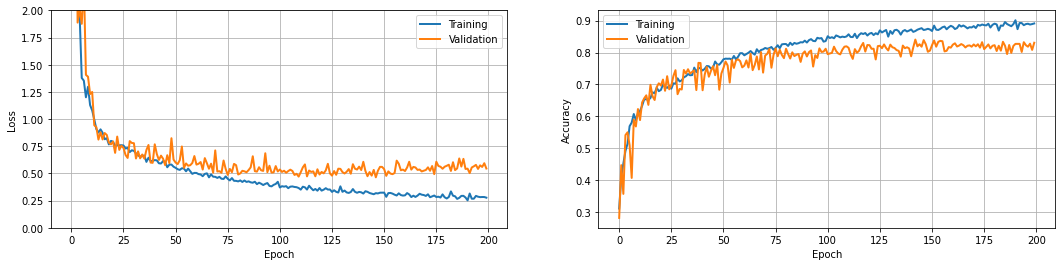

In [ ]:
# Plot loss
plt.figure(figsize=(18, 4))

plt.subplot(1, 2, 1)
plt.plot(DNN.history.history['loss'], label='Training', linewidth=2)
plt.plot(DNN.history.history['val_loss'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 2])
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(DNN.history.history['categorical_accuracy'], label='Training', linewidth=2)
plt.plot(DNN.history.history['val_categorical_accuracy'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

plt.show()

In [ ]:
# Train another model using earlystopping
DNN2 = create_model()
DNN2.compile(optimizer='adam', loss='categorical_crossentropy',
            metrics=['categorical_accuracy', tf.keras.metrics.FalseNegatives()])
DNN2.fit(x=x_train, y=y_train, batch_size=64, epochs=300, validation_data=(x_val, y_val),
        callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

Epoch 1/300
240/240 [==============================] - 26s 5ms/step - loss: 10.3491 - categorical_accuracy: 0.3451 - false_negatives_1: 10133.0000 - val_loss: 6.1950 - val_categorical_accuracy: 0.3163 - val_false_negatives_1: 1168.0000
Epoch 2/300
240/240 [==============================] - 1s 4ms/step - loss: 3.5491 - categorical_accuracy: 0.4422 - false_negatives_1: 8738.0000 - val_loss: 3.2516 - val_categorical_accuracy: 0.4691 - val_false_negatives_1: 920.0000
Epoch 3/300
240/240 [==============================] - 1s 4ms/step - loss: 2.0892 - categorical_accuracy: 0.5103 - false_negatives_1: 7796.0000 - val_loss: 3.2016 - val_categorical_accuracy: 0.4209 - val_false_negatives_1: 1007.0000
Epoch 4/300
240/240 [==============================] - 1s 3ms/step - loss: 1.9155 - categorical_accuracy: 0.5354 - false_negatives_1: 7470.0000 - val_loss: 2.4568 - val_categorical_accuracy: 0.4533 - val_false_negatives_1: 946.0000
Epoch 5/300
240/240 [==============================] - 1s 3ms/step 

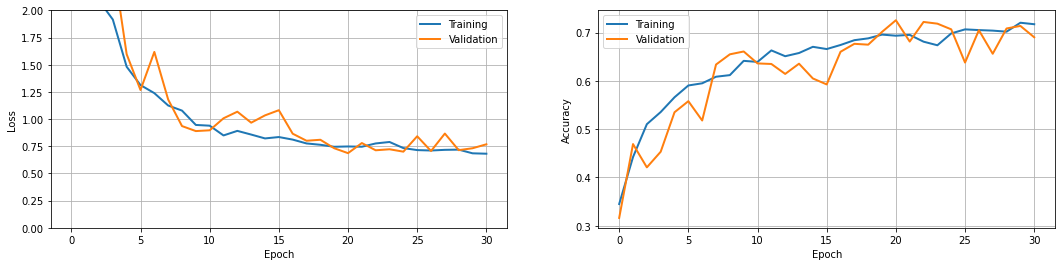

In [ ]:
# Plot loss
plt.figure(figsize=(18, 4))

plt.subplot(1, 2, 1)
plt.plot(DNN2.history.history['loss'], label='Training', linewidth=2)
plt.plot(DNN2.history.history['val_loss'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 2])
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(DNN2.history.history['categorical_accuracy'], label='Training', linewidth=2)
plt.plot(DNN2.history.history['val_categorical_accuracy'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

plt.show()

In [ ]:
# Compute test loss
test_loss = DNN2.evaluate(x=x_test, y=y_test, verbose=False)
test_loss

[0.6948351860046387, 0.7185184955596924, 602.0]

In [ ]:
# Predict on test set
y_test_hat = DNN.predict(x=x_test)
print(y_test_hat.shape)
print(y_test_hat[:10].round())

60/60 [==============================] - 0s 1ms/step
(1890, 7)
[[0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0.]]


In [ ]:
# Back to categorical labels
y_test_hat_cat = np.argmax(y_test_hat, axis=1)
y_test_cat = np.argmax(y_test, axis=1)

print(y_test_hat_cat[:10])
print(y_test_cat[:10])

[3 5 0 3 2 0 4 3 6 4]
[3 5 0 3 2 0 4 3 6 1]


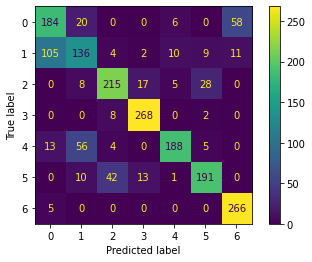

In [ ]:
# Confussion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
Conf_Mat = confusion_matrix(y_test_cat, y_test_hat_cat)

ConfusionMatrixDisplay.from_predictions(y_test_cat, y_test_hat_cat)
plt.show()